In [36]:
# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías de machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Leer archivo CSV
dataset = pd.read_csv('C:/Users/user/Desktop/Practica Python/CBC data_for_meandeley_csv_01052023.csv')

dataset.head()

,S. No.,Age,Sex,RBC,PCV,MCV,MCH,MCHC,RDW,TLC,PLT /mm3,HGB
0,1,28,0,5.66,34.0,60.1,17.0,28.2,20.0,11.10,128.3,9.6
1,2,41,0,4.78,44.5,93.1,28.9,31.0,13.0,7.02,419.0,13.8
2,3,40,1,4.65,41.6,89.5,28.8,32.2,13.0,8.09,325.0,13.4
3,4,76,0,4.24,36.7,86.6,26.7,30.8,14.9,13.41,264.0,11.3
4,5,20,1,4.14,36.9,89.1,27.8,31.2,13.2,4.75,196.0,11.5


In [4]:
# Crear una copia del dataset original
dataset_copy = dataset.copy()

# Ver las columnas principales (nombres de las columnas)
print(dataset_copy.columns)

Index(['S. No.', 'Age', 'Sex', 'RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW',
       'TLC', 'PLT /mm3', 'HGB'],
      dtype='object')


In [5]:
# Obtener estadísticas descriptivas para todas las variables numéricas
descripcion = dataset_copy.describe()

# Mostrar las estadísticas descriptivas
print(descripcion)

           S. No.         Age         Sex         RBC         PCV         MCV  \
count  364.000000  364.000000  364.000000  364.000000  364.000000  364.000000   
mean   182.500000   44.917582    0.442308    4.278736   36.762912   87.509121   
std    105.221988   18.780854    0.497344    0.820166    6.830835    9.332164   
min      1.000000   11.000000    0.000000    1.360000   13.100000   55.700000   
25%     91.750000   28.000000    0.000000    3.780000   32.900000   83.175000   
50%    182.500000   44.500000    0.000000    4.335000   36.800000   87.950000   
75%    273.250000   60.000000    1.000000    4.800000   41.850000   91.875000   
max    364.000000   89.000000    1.000000    6.900000   56.900000  124.100000   

              MCH        MCHC         RDW         TLC    PLT /mm3         HGB  
count  364.000000  364.000000  364.000000  364.000000  364.000000  364.000000  
mean    28.227143   32.053407   15.116511    8.863571  223.750824   11.907692  
std      3.865998    2.801790 

In [6]:
# Definir las columnas de características
columns_to_use = ['RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC', 'PLT /mm3', 'HGB']
X = dataset_copy[columns_to_use]

In [12]:
# Escalar los datos (esto ya lo habías hecho, pero lo incluimos aquí por contexto)
scaler = StandardScaler()
X_scaled_RBC = scaler.fit_transform(X)

In [13]:
# Aplicar DBSCAN
dbscan_model_RBC = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters_RCB = dbscan_model_RBC.fit_predict(X_scaled_RBC)

In [14]:
# Asignar los clusters a la variable 'y_classification'
y_classification = dbscan_clusters_RCB  # Ahora sí tenemos los clusters

In [15]:
# Ejemplo usando DBSCAN como target para clasificación
y_classification = dbscan_clusters_RCB  # Usar los clusters como objetivo

In [16]:
# Ejemplo de regresión: Predecir HGB
y_regression = dataset_copy['HGB']  # Usar HGB como variable objetivo

In [17]:
# Separar datos para entrenamiento y prueba
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

In [18]:
# Inicializar el modelo Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [19]:
# Entrenar el modelo con los datos de entrenamiento
rf_classifier.fit(X_train_class, y_train_class)

RandomForestClassifier(random_state=42)

In [20]:
# Hacer predicciones en los datos de prueba
y_pred_class_rf = rf_classifier.predict(X_test_class)

In [21]:
# Mostrar el reporte de clasificación
print("Reporte de Clasificación - Random Forest Classifier:")
print(classification_report(y_test_class, y_pred_class_rf))

Reporte de Clasificación - Random Forest Classifier:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        73

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


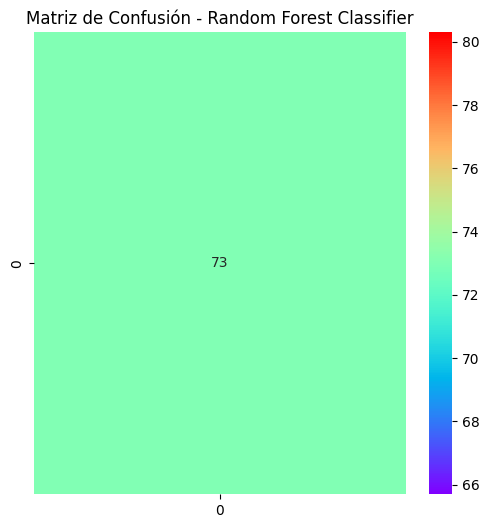

In [22]:
# Graficar la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test_class, y_pred_class_rf), annot=True, cmap='rainbow', fmt='d')
plt.title("Matriz de Confusión - Random Forest Classifier")
plt.show()

In [25]:
# Inicializar el modelo Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)

In [26]:
# Inicializar el modelo Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)

In [27]:
# Entrenar el modelo
dt_classifier.fit(X_train_class, y_train_class)

DecisionTreeClassifier(random_state=42)

In [28]:
# Hacer predicciones
y_pred_class_dt = dt_classifier.predict(X_test_class)

In [29]:
# Mostrar el reporte de clasificación
print("Reporte de Clasificación - Decision Tree Classifier:")
print(classification_report(y_test_class, y_pred_class_dt))

Reporte de Clasificación - Decision Tree Classifier:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        73

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



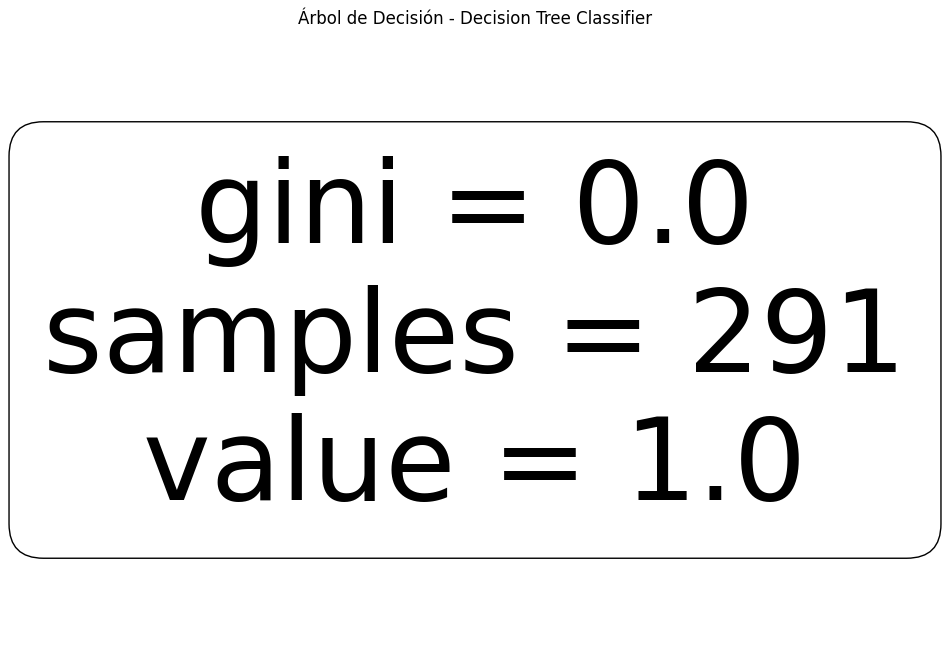

In [30]:
# Graficar el árbol de decisión
plt.figure(figsize=(12,8))
tree.plot_tree(dt_classifier, feature_names=columns_to_use, class_names=True, filled=True, rounded=True)
plt.title("Árbol de Decisión - Decision Tree Classifier")
plt.show()

In [32]:
# Inicializar el modelo Random Forest para regresión
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [33]:
# Entrenar el modelo
rf_regressor.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

In [34]:
# Predicciones
y_pred_reg_rf = rf_regressor.predict(X_test_reg)

In [35]:
# Métrica de evaluación
print(f"Error cuadrático medio - Random Forest Regressor: {mean_squared_error(y_test_reg, y_pred_reg_rf)}")

Error cuadrático medio - Random Forest Regressor: 0.010232999999999836


In [37]:
# Inicializar el modelo Decision Tree para regresión
dt_regressor = DecisionTreeRegressor(random_state=42)

In [38]:
# Entrenar el modelo
dt_regressor.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(random_state=42)

In [39]:
# Predicciones
y_pred_reg_dt = dt_regressor.predict(X_test_reg)

In [40]:
# Métrica de evaluación
print(f"Error cuadrático medio - Decision Tree Regressor: {mean_squared_error(y_test_reg, y_pred_reg_dt)}")

Error cuadrático medio - Decision Tree Regressor: 0.005753424657534217


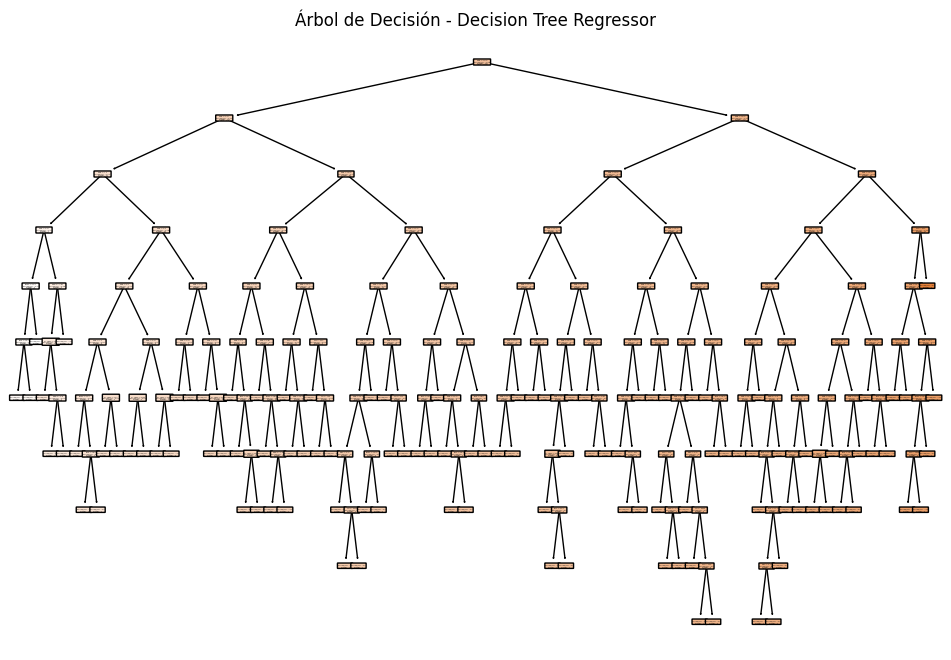

In [41]:
# Graficar el árbol de decisión de regresión
plt.figure(figsize=(12,8))
tree.plot_tree(dt_regressor, feature_names=columns_to_use, filled=True, rounded=True)
plt.title("Árbol de Decisión - Decision Tree Regressor")
plt.show()